In [1]:
import cv2 as cv
import numpy as np
from chess_homography import *
from ultralytics import YOLO

In [2]:
# # Start by getting the params from my_cam_matrix.npz
# npz_calib = np.load('pics/my_cam_matrix.npz')

# print(npz_calib)

# # Get the camera matrix and distortion coefficients
# camera_matrix = npz_calib['mtx']
# dist_coeffs = npz_calib['dist']

# # Get all jpg files in pics/
# import os
# pics = [f for f in os.listdir('pics/') if f.endswith('.jpg') and f.startswith('2024')]

# # Loop through all the pics
# for pic in pics:
#     # Read the image
#     img = cv.imread('pics/' + pic)
#     # Get the shape of the image
#     h, w = img.shape[:2]
#     # Get the new camera matrix
#     # new_camera_matrix, roi = cv.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w, h), 1, (w, h))
#     # Undistort the image
#     undistorted_img = cv.undistort(img, camera_matrix, dist_coeffs)#, None, new_camera_matrix)
#     # Save the undistorted image
#     # cv.imwrite('pics/undistorted_' + pic, undistorted_img)
#     # Show the undistorted image
#     cv.imshow('Undistorted Image', undistorted_img)
#     if cv.waitKey(0) & 0xFF == ord('q'):
#         break
    
# cv.destroyAllWindows()

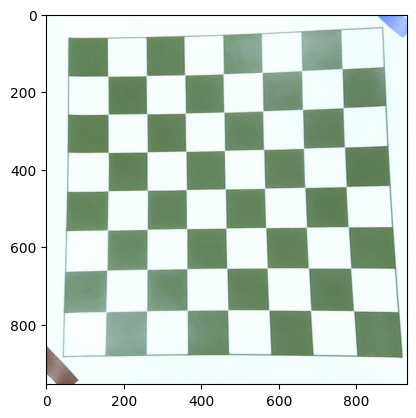

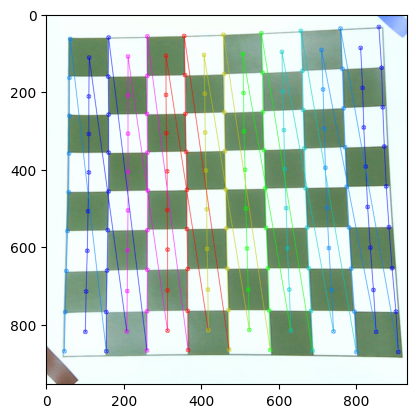

In [3]:
query = cv.imread('pics/query.jpg', cv.IMREAD_COLOR)
assert not isinstance(query, type(None))
plt.imshow(query)
plt.show()
centers, corners = get_centers(query, plot=True, return_corners=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255
255
(954, 931, 3)


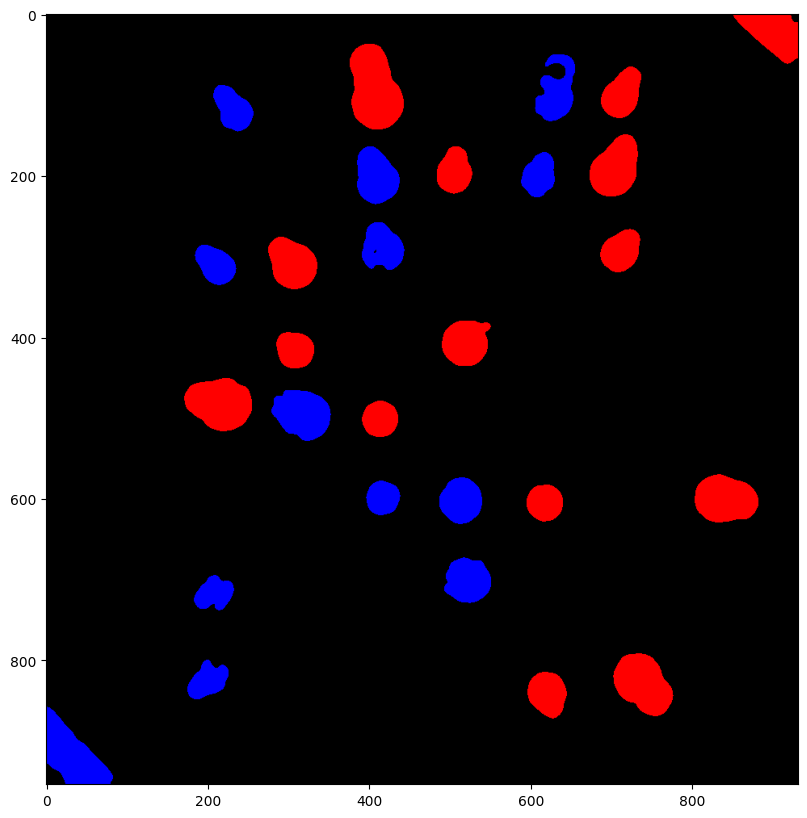

[['a1' 'a2' 'a3' 'a4' 'a5' 'a6' 'a7' 'a8']
 ['b1' 'b2' 'b3' 'b4' 'b5' 'b6' 'b7' 'b8']
 ['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8']
 ['d1' 'd2' 'd3' 'd4' 'd5' 'd6' 'd7' 'd8']
 ['e1' 'e2' 'e3' 'e4' 'e5' 'e6' 'e7' 'e8']
 ['f1' 'f2' 'f3' 'f4' 'f5' 'f6' 'f7' 'f8']
 ['g1' 'g2' 'g3' 'g4' 'g5' 'g6' 'g7' 'g8']
 ['h1' 'h2' 'h3' 'h4' 'h5' 'h6' 'h7' 'h8']]
[[False  True False  True False  True  True False]
 [False False False  True  True  True  True False]
 [False  True  True  True False False  True False]
 [False False  True False  True False False False]
 [False  True  True  True False False False False]
 [False False False  True  True  True False  True]
 [False  True False False  True False False False]
 [False  True False False False  True  True False]]
['a2', 'a4', 'a6', 'a7', 'b4', 'b5', 'b6', 'b7', 'c2', 'c3', 'c4', 'c7', 'd3', 'd5', 'e2', 'e3', 'e4', 'f4', 'f5', 'f6', 'f8', 'g2', 'g5', 'h2', 'h6', 'h7']


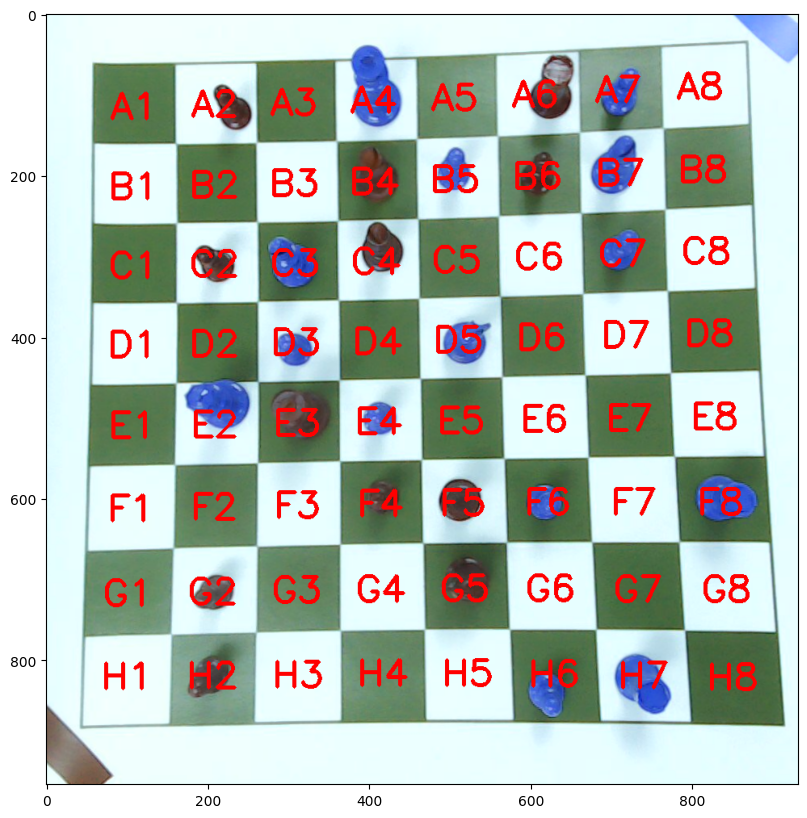

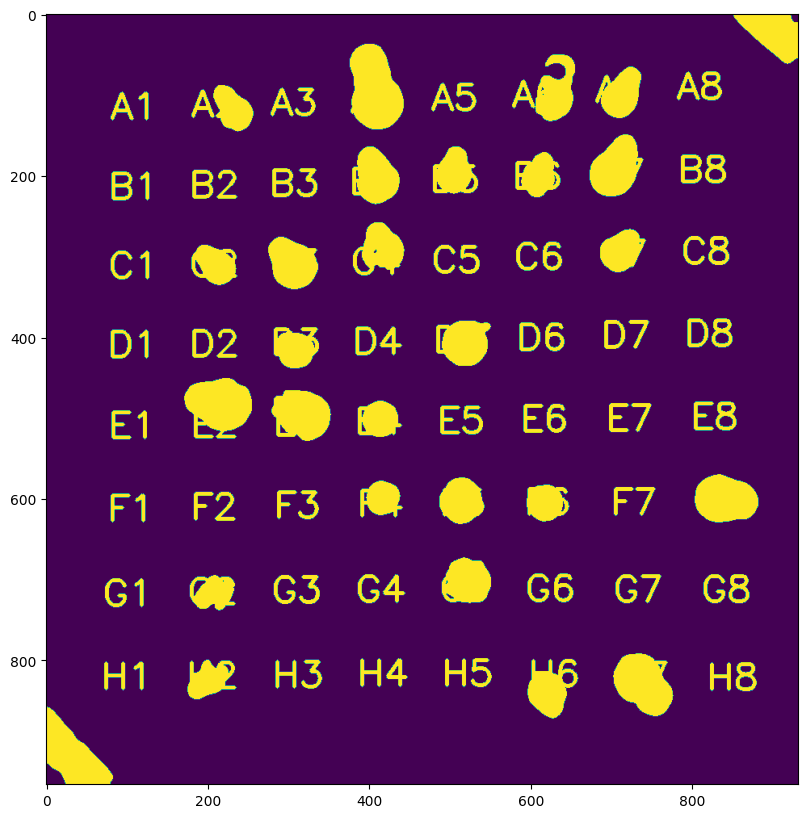

In [4]:
reference = cv.imread(f'pics/2024-04-09-112430.jpg', cv.IMREAD_COLOR)
ret, reference, diff, occupancy, spaces_occupant = get_board(query, reference, centers, corners, plot=False)
print(occupancy)
print(spaces_occupant)
show_board_labels(reference.copy(), centers, (8,8))
show_board_labels(diff.copy(), centers, (8,8))

In [5]:
new_state = [i for i in spaces_occupant]
new_state[-1] = 'd7'
start, end = get_move(spaces_occupant, new_state)
print(start)
print(end)
print("Stockfish Command:", start[0] + end[0])

['h7']
['d7']
Stockfish Command: h7d7
